In [1]:
import os
import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

import pysptools.spectro as spectro

import scipy.signal as ss

# Figures and plot settings
plt.rcParams['figure.figsize'] = [50, 30]
plt.rcParams['figure.dpi'] = 600
kwargs = {'linestyle':':', 'c':'g', 'lw':3}
kwargs2 = {'linestyle':'-', 'c':'r', 'lw':3}

%matplotlib inline

# One file

In [2]:
os.chdir(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\HSI-ROI-Scales")

In [3]:
# ENVI 'plot' export - Suppose is when you compute statistics and export
columns = ['Wavelength','Min','Mean-Std','Mean','Mean+Std','Max']
df = pd.read_csv(r"GN04_32pixels.txt", header = 7, sep=' ', names=columns, index_col = 0, skipinitialspace=True)

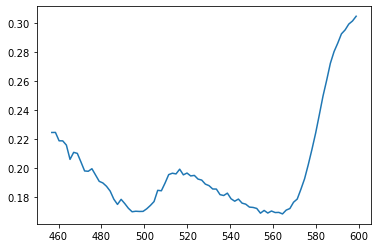

In [4]:
spectra = np.asarray(df.loc['456':'600',:]['Mean'].values)
wavelengths = np.asarray(df.loc['456':'600',:].index.values)

plt.plot(wavelengths, spectra)

In [26]:
cca = list(df.loc['456':'600',:]['Mean'].values)
wvl = list(df.loc['456':'600',:].index.values)

In [27]:
cca_chr = spectro.FeaturesConvexHullQuotient(cca, wvl, baseline=0.999)

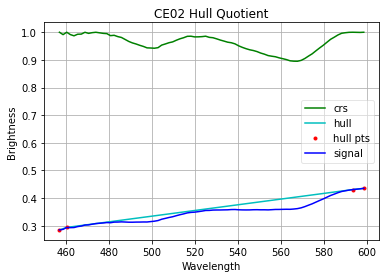

In [28]:
#cca_chr.features_all[1]
cca_chr.display_convex_hull_quotient(plot_name='CE02')

In [29]:
cca_chr.get_number_of_kept_features()

2

In [30]:
#cca_chr._FWHM(feat=cca_chr.features[0])
cca_chr.ge

In [31]:
cca_chr.print_stats(feat_no = 'all')

Feature Stats
  ---------------------------
  feature number: 1
  ---------------------------
  area: 0.014644653941208176
  ---------------------------
  continuum start wavelength: 456.87
  continuum stop wavelength: 460.27
  continuum slope: 0.002636764705882371
  ---------------------------
  center wavelength: 458.57
  depth: 0.9913854976816422
  ---------------------------
  full-width at half maximum: 3.3999999999999773

Feature Stats
  ---------------------------
  feature number: 2
  ---------------------------
  area: 5.350238142666581
  ---------------------------
  continuum start wavelength: 460.27
  continuum stop wavelength: 593.46
  continuum slope: 0.0010287183722501685
  ---------------------------
  center wavelength: 567.74
  depth: 0.8950415561855954
  ---------------------------
  full-width at half maximum: 39.389999999999986



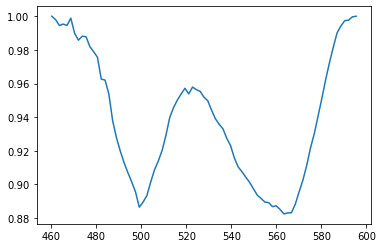

In [169]:
bbb = cca_chr.get_continuum_removed_spectrum(feat_no=3)
plt.plot(np.arange(460.27,596.9,1.69),bbb)

# Loop for all files

In [84]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\HSI-ROI-Scales\Pigmented")
files = list(files_path.glob('*.txt'))

In [85]:
samples = []
columns = ['Wavelength','Min','Mean-Std','Mean','Mean+Std','Max']

for i, file in enumerate(files):
    samples.append(files[i].stem[5:])

In [86]:
roi = []

for i, file in enumerate(files):
    df = pd.read_csv(files[i], header=7, sep=' ', names=columns, index_col=0, skipinitialspace=True)
    roi.append(df['Mean'])

samples_df = pd.concat(roi, axis=1, ignore_index=True)
samples_df.columns = samples

# Discard noisy bands > 420 nm and < 800 nm
samples_df = samples_df.loc['450':'800',:]
# Acquire the x_scale right after cropping the dataframe.
x_scale = samples_df.index

In [87]:
#Missing GN01, possibly required to drop CE05
#samples_df.to_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\sample_spectrum.csv")
samples_df

,16by16,25by25,2by2,8by8
Wavelength,,,,
450.09,0.239653,0.232468,0.224625,0.231632
451.79,0.239602,0.235659,0.242618,0.234831
453.48,0.249043,0.243198,0.233027,0.247516
455.18,0.247480,0.242348,0.245681,0.249958
456.87,0.257790,0.248169,0.239505,0.254206
...,...,...,...,...
791.42,0.667123,0.661115,0.717259,0.681123
793.14,0.667703,0.661427,0.720099,0.682257
794.86,0.668879,0.662901,0.717942,0.682689


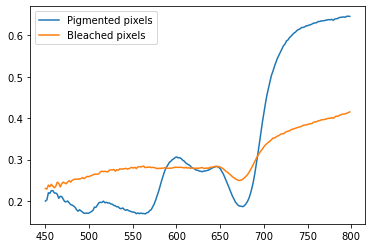

In [75]:
# 32 pixels
plt.plot(samples_df['32pixels'], label='Pigmented pixels')
plt.plot(samples_df['B_32pixels'], label='Bleached pixels')
#plt.title('Spectra comparison')
plt.legend()
plt.savefig(str(files_path) + '/32pixels.png', dpi=600)
plt.show()

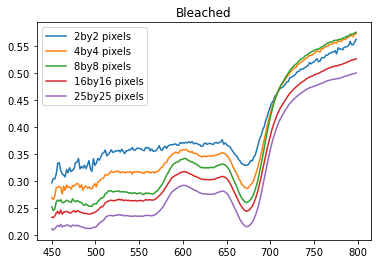

In [83]:
# Bleached
plt.plot(samples_df['2by2'], label='2by2 pixels')
plt.plot(samples_df['4by4'], label='4by4 pixels')
plt.plot(samples_df['8by8'], label='8by8 pixels')
plt.plot(samples_df['16by16'], label='16by16 pixels')
plt.plot(samples_df['25by25'], label='25by25 pixels')
#plt.plot(samples_df['32pixels'], label='32 pixels')
plt.title('Bleached')
plt.legend()
plt.savefig(str(files_path) + '/bleached.png', dpi=600)
plt.show()

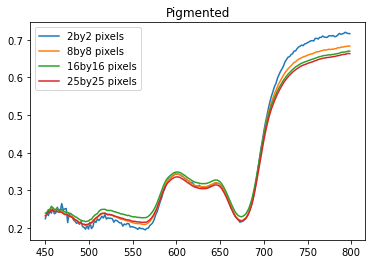

In [89]:
plt.plot(samples_df['2by2'], label='2by2 pixels')
plt.plot(samples_df['8by8'], label='8by8 pixels')
plt.plot(samples_df['16by16'], label='16by16 pixels')
plt.plot(samples_df['25by25'], label='25by25 pixels')
#plt.plot(samples_df['32pixels'], label='32 pixels')
plt.title('Pigmented')
plt.legend()
plt.savefig(str(files_path) + '/pigmented.png', dpi=600)
plt.show()

In [114]:
derivatives = []

for col in samples_df.columns[:]:
    target = ss.savgol_filter(samples_df[col], 3, 1, deriv = 1)
    derivatives.append(pd.Series(target))

deriv_df = pd.concat(derivatives, axis=1, ignore_index=True)
deriv_df.columns = samples
deriv_df.set_index(x_scale, inplace=True)

In [115]:
deriv_df.head()

,CE01,CE01B,CE02,CE03,CE03B,CE04,CE05,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
Wavelength,,,,,,,,,,,,,,,
450.09,0.002750,0.001735,0.001049,0.002191,0.001398,0.001189,-0.000059,0.003296,0.001730,0.003588,0.003006,0.003345,0.003270,0.003840,0.004514
451.79,0.002750,0.001736,0.001050,0.002191,0.001399,0.001190,-0.000059,0.003296,0.001730,0.003588,0.003006,0.003345,0.003270,0.003840,0.004514
453.48,0.002087,0.002533,-0.000424,0.002003,0.003179,0.001815,0.006015,0.003001,0.001958,0.003234,0.002464,0.002479,0.002739,0.000398,0.001691
455.18,0.000976,0.001137,0.003147,0.002179,0.002491,0.001600,0.005611,0.002804,0.002465,0.003008,0.002546,0.002310,0.002156,0.002309,0.001792
456.87,0.002005,0.002324,0.003445,0.001732,0.001649,0.003685,0.001059,0.002354,0.000981,0.001188,0.002865,0.001464,0.001440,0.002231,0.002668


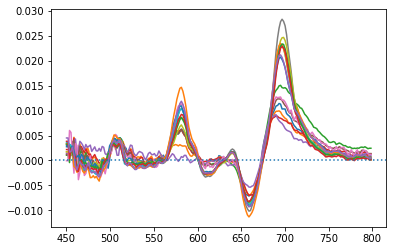

In [134]:
plt.plot(deriv_df)
plt.axhline(0.0, **kwargs)
plt.show()

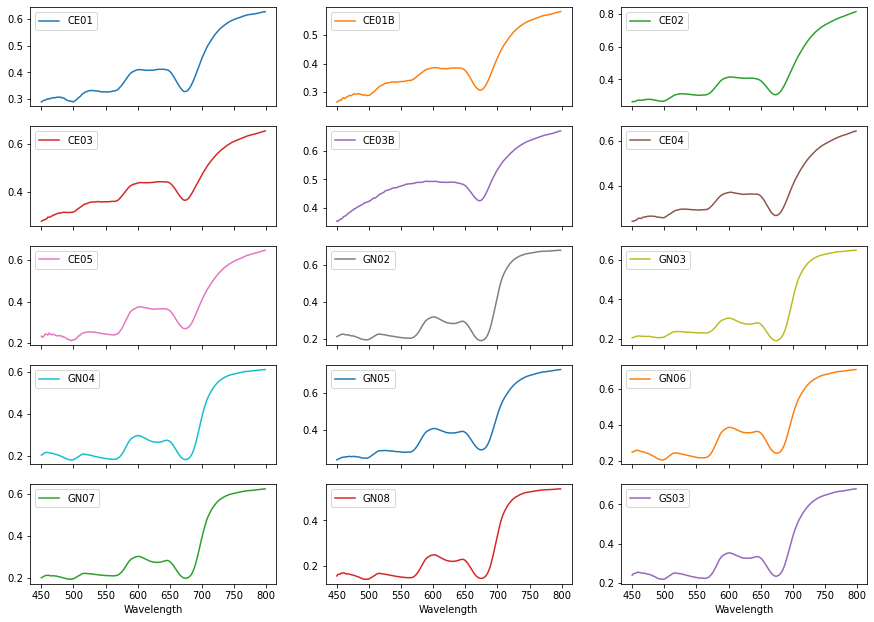

In [146]:
samples_df.plot(subplots=True, layout=(7,3), figsize=(15, 15))
plt.show()

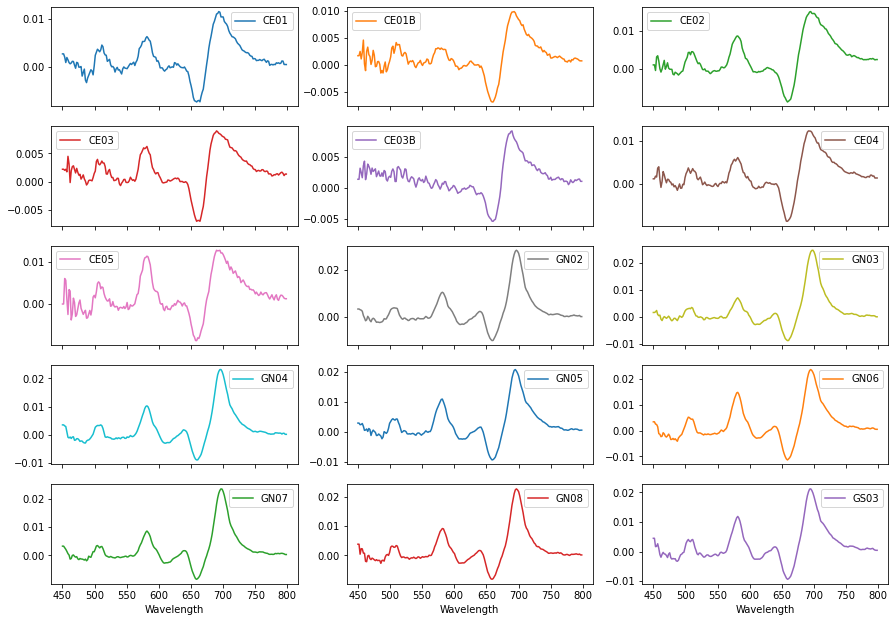

In [153]:
fig = deriv_df.plot(subplots=True, layout=(7,3), figsize=(15, 15))
plt.show()

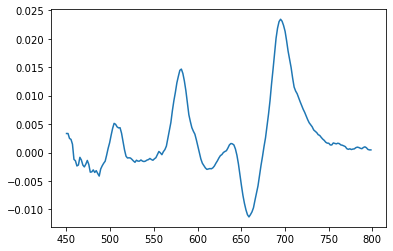

In [154]:
target = deriv_df['GN06']

plt.plot(x_scale, target)

[451.79, 504.49, 511.31, 581.45, 638.14, 694.95, 755.25, 760.42, 791.42]


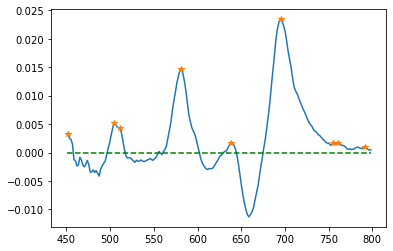

In [186]:
from scipy import signal
import numpy as np

peak, _ = signal.find_peaks(target, height=0.001)

peaks = []
for p in peak:
    peaks.append(x_scale[p])
#print(x_scale[peak[1]])
print(peaks)

plt.plot(x_scale, target)
plt.plot(target[peaks], "*")
plt.plot(x_scale, np.zeros_like(target), "--", color="green")

[461.96, 470.45, 477.25, 482.35, 487.46, 528.38, 531.8, 538.64, 548.9, 610.64, 615.79, 658.79]


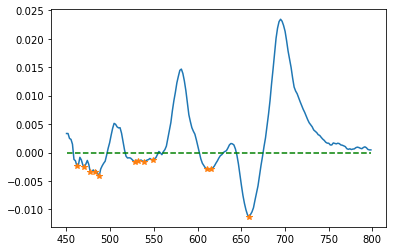

In [187]:
peak, _ = signal.find_peaks(target*-1, height=0.001)

peaks = []
for p in peak:
    peaks.append(x_scale[p])
#print(x_scale[peak[1]])
print(peaks)

plt.plot(x_scale, target)
plt.plot(target[peaks], "*")
plt.plot(x_scale, np.zeros_like(target), "--", color="green")

## Determine reflectance wavebands

In [127]:
# Main absorption peaks of photosynthetic pigments of Rhodophyta from Hedley & Mumby (2002)
# Chlorophyll a
chla = 435
chla2 = 670
chla3 = 680

# Carotenoids
calpha1 = 423
calpha2 = 444
calpha3 = 473
calpha4 = 500

# Xantophylls
# Zeaxanthin
zxn1 = 428
zxn2 = 450
zxn3 = 478
# Lutein
ltn1 = 422
ltn2 = 445
ltn3 = 474

# Phycobilins
# Phycocyanin
pcn = 618
# Phycoerythrin
pe1 = 490
pe2 = 546
pe3 = 576
# Allophycocyanin
apcn = 654

kwargs = {'linestyle':':'}

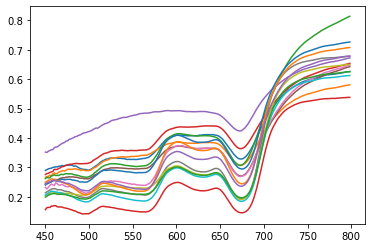

In [183]:
plt.plot(samples_df)
plt.show()